In [1]:
import xarray as xr
%matplotlib inline

from os.path import dirname, join

import numpy as np
import pandas.io.sql as psql
import sqlite3 as sql

from bokeh.plotting import figure
from bokeh.layouts import layout, widgetbox, row
from bokeh.models import ColumnDataSource, Div, PreText
from bokeh.models.widgets import Slider, Select, TextInput
from bokeh.io import curdoc

import bokeh as bokeh
import pandas as pd
import xarray as xr
import holoviews as hv
import numpy as np
import dask
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
from holoviews.operation import decimate

import geoviews as gv
from cartopy import crs
import geoviews.feature as gf
import dask.array as da


/home/max/anaconda3/envs/ncview2/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/max/anaconda3/envs/ncview2/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [7]:
file = "2016033000-ART-chemtracer_grid_reg_DOM01_PL_0024.nc"
link = "http://eos.scc.kit.edu/thredds/dodsC/polstracc0new/2016033000/{}".format(file)

In [8]:
first = xr.open_dataset(link)

In [5]:
one = first.temp.isel(lev=10).squeeze()

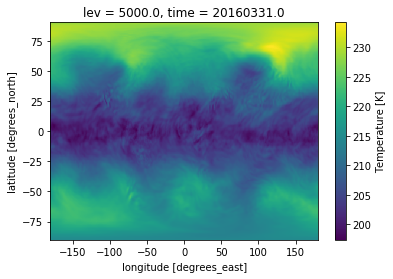

In [6]:
one.plot()

In [8]:
dim = "lon"
var = "temp"
dimk = "lev"

selection = dict(lon=23,lat=12)
# o = .data
# list(range(0,o.size))
first.temp[:,:,:,0]
getattr(first, var).sel({dim:-180}).isel({dimk: 32})

<xarray.DataArray 'temp' (time: 1, lat: 361)>
array([[233.08408, 229.75702, 230.66676, ..., 242.00491, 241.76273, 241.51904]],
      dtype=float32)
Coordinates:
    lon      float64 -180.0
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
    lev      float64 6.5e+04
  * time     (time) float64 2.016e+07
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K
    param:          0.0.0

In [ ]:
getattr(first, var).sel(selection).lon

In [ ]:
getattr(first, var).sel(lat=slice(2,45)).lat

In [9]:
first

<xarray.Dataset>
Dimensions:            (lat: 361, lev: 47, lon: 721, time: 1)
Coordinates:
  * lon                (lon) float64 -180.0 -179.5 -179.0 ... 179.0 179.5 180.0
  * lat                (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lev                (lev) float64 10.0 25.0 50.0 ... 9.5e+04 9.75e+04 1e+05
  * time               (time) float64 2.016e+07
Data variables:
    TRO3_chemtr        (time, lev, lat, lon) float32 ...
    qv                 (time, lev, lat, lon) float32 ...
    qc                 (time, lev, lat, lon) float32 ...
    qi                 (time, lev, lat, lon) float32 ...
    u                  (time, lev, lat, lon) float32 ...
    v                  (time, lev, lat, lon) float32 ...
    w                  (time, lev, lat, lon) float32 ...
    geopot             (time, lev, lat, lon) float32 ...
    omega              (time, lev, lat, lon) float32 ...
    pv                 (time, lev, lat, lon) float32 ...
    vor                (time, lev, 